## Import des librairies ##

In [14]:
#Imports librairies de base
import numpy as np
import pandas as pd

#Affichage de Graphes
from IPython.display import Markdown, display, HTML
import matplotlib.pyplot as plt

#Information Mutuelle
from sklearn.feature_selection import mutual_info_classif


## 1. Lecture des données ##

1.1 Charger les données d'apprentissage (Data/passagers.csv) dans un DataFrame nommé train. Afficher 10 exemples.

In [2]:
# 1.1 Charger les données et afficher 10 exemples
train_df = pd.read_csv('data/passagers.csv')
train_df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
750,751,1,2,"Wells, Miss. Joan",female,4.0,1,1,29103,23.0000,NaN,S
317,318,0,2,"Moraweck, Dr. Ernest",male,54.0,0,0,29011,14.0000,NaN,S
347,348,1,3,"Davison, Mrs. Thomas Henry (Mary E Finck)",female,NaN,1,0,386525,16.1000,NaN,S
362,363,0,3,"Barbara, Mrs. (Catherine David)",female,45.0,0,1,2691,14.4542,NaN,C
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
376,377,1,3,"Landergren, Miss. Aurora Adelia",female,22.0,0,0,C 7077,7.2500,NaN,S
560,561,0,3,"Morrow, Mr. Thomas Rowan",male,NaN,0,0,372622,7.7500,NaN,Q
453,454,1,1,"Goldenberg, Mr. Samuel L",male,49.0,1,0,17453,89.1042,C92,C
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C


1.2 Charger les données d'apprentissage (Data/test.csv) dans un Dataframe nommé test. Afficher 10 exemples.

In [3]:
# 1.2 charger les données d'apprentissage et afficher 10 exemples
test_df = pd.read_csv("data/test.csv")
test_df.sample(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
349,1241,2,"Walcroft, Miss. Nellie",female,31.0,0,0,F.C.C. 13528,21.0000,NaN,S
81,973,1,"Straus, Mr. Isidor",male,67.0,1,0,PC 17483,221.7792,C55 C57,S
119,1011,2,"Chapman, Mrs. John Henry (Sara Elizabeth Lawry)",female,29.0,1,0,SC/AH 29037,26.0000,NaN,S
35,927,3,"Katavelas, Mr. Vassilios (Catavelas Vassilios"")""",male,18.5,0,0,2682,7.2292,NaN,C
263,1155,3,"Klasen, Miss. Gertrud Emilia",female,1.0,1,1,350405,12.1833,NaN,S
209,1101,3,"Delalic, Mr. Redjo",male,25.0,0,0,349250,7.8958,NaN,S
373,1265,2,"Harbeck, Mr. William H",male,44.0,0,0,248746,13.0000,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C
319,1211,2,"Jefferys, Mr. Ernest Wilfred",male,22.0,2,0,C.A. 31029,31.5000,NaN,S
314,1206,1,"White, Mrs. John Stuart (Ella Holmes)",female,55.0,0,0,PC 17760,135.6333,C32,C


1.3 Afficher les informations des deux DataFrames train et Test.

In [4]:
# 1.3 Afficher les informations des deux DataFrames train_df et test_df
print("============== INFOR TRAIN DATAFRAME ==============")
train_df.info()
print("\n============== INFOR TEST DATAFRAME ==============")
test_df.info()

============== INFOR TRAIN DATAFRAME ==============
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

============== INFOR TEST DATAFRAME ==============
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  D

1.4 Calculer le taux global de survie

In [5]:
# 1.4 Calcul du taux global de survie sur le dataframe train
survival_rate = train_df['Survived'].mean()
print(f"Taux de survie : {survival_rate*100:2f}%")

Taux de survie : 38.383838%


#### Question 1 : Quel Travail voyez-vous pour que les données soient prêtes à faire tourner dans un modèle ?

> Les colonnes Age, Cabin et Embarked comporte des données manquante, il faudrait d'abord les nettoyer avant de pouvoir les faire tourner dans un modèle
---
#### Question 2 : Quelle différence y-a-t'il entre les données train et les données test ?

> La colonne 'Survived' n'est pas présente sur le dataframe test.
---

#### Question 3 : Quel est le rôle de ces deux sets de données ?
> Le jeu de données train sert à entraîner le modèle, tandis que le jeu de données test sert à évaluer le modèle sur de nouvelles données

## 2. Analyse des features

2.1 Analyser l'effet de la variable Classe sur le taux de survie, en affichant le % de survie par classe

In [31]:
# 2.1 Taux de survie en pourcentage par rapport à la classe du passager
class_survival_rate = train_df.groupby('Pclass', observed=False)['Survived'].mean() * 100
class_survival_rate = class_survival_rate.round(2).reset_index()
class_survival_rate.columns = ['Pclass', 'Survival Rate (%)']
print(class_survival_rate)

   Pclass  Survival Rate (%)
0       1              62.96
1       2              47.28
2       3              24.24


2.2 Analyser l'effet de la variable Genre (Sex) sur le taux de survie, en affichant le % de survie par classe

In [32]:
# 2.1 Taux de survie en pourcentage par rapport au sex du passager
sex_survival_rate = train_df.groupby('Sex', observed=False)['Survived'].mean() * 100
sex_survival_rate = sex_survival_rate.round(2).reset_index()
sex_survival_rate.columns = ['Sex', 'Survival Rate (%)']
print(sex_survival_rate)

      Sex  Survival Rate (%)
0  female              74.20
1    male              18.89


2.3 Calculer une nouvelle colonne FamilySize contenant la taille de la famille, pour les DataFrame train et Test. Afficher pour 10 exemples l'Id du passager, le nom, l'age, le sexe et la taille de la famille.

In [8]:
# 2.3 ajout d'une nouvelle colonne FamilySize et affichage de 10 exemples
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1
train_df[['PassengerId', 'Name', 'Age', 'Sex', 'FamilySize']].sample(10)

,PassengerId,Name,Age,Sex,FamilySize
801,802,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",31.0,female,3
427,428,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",19.0,female,1
695,696,"Chapman, Mr. Charles Henry",52.0,male,1
471,472,"Cacic, Mr. Luka",38.0,male,1
567,568,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",29.0,female,5
684,685,"Brown, Mr. Thomas William Solomon",60.0,male,3
446,447,"Mellinger, Miss. Madeleine Violet",13.0,female,2
121,122,"Moore, Mr. Leonard Charles",NaN,male,1
119,120,"Andersson, Miss. Ellis Anna Maria",2.0,female,7
630,631,"Barkworth, Mr. Algernon Henry Wilson",80.0,male,1


2.4 Visualisez le nombre de personnes et le taux de survie par taille de famille.

In [33]:
family_size_survival_rate = train_df.groupby('FamilySize', observed=False).agg(
    count=('PassengerId', 'size'),
    survival_rate=('Survived', 'mean')
).round(2).reset_index()
family_size_survival_rate['survival_rate'] = family_size_survival_rate['survival_rate']*100
family_size_survival_rate.columns = ['FamilySize', 'Count', 'Survival Rate (%)']
print(family_size_survival_rate)

   FamilySize  Count  Survival Rate (%)
0           1    537               30.0
1           2    161               55.0
2           3    102               58.0
3           4     29               72.0
4           5     15               20.0
5           6     22               14.0
6           7     12               33.0
7           8      6                0.0
8          11      7                0.0


2.5 Calculer une nouvelle colonne IsAlone indiquant si le passager est seul ou pas, pour les DataFrame train et Test. Afficher pour 10 exemples l'Id du passager, le nom, l'age, le sexe et le status IsAlone.

In [10]:
train_df['IsAlone'] = ((train_df['SibSp'] == 0) & (train_df['Parch'] == 0)).astype(int)
test_df['IsAlone'] = ((test_df['SibSp'] == 0) & (test_df['Parch'] == 0)).astype(int)
train_df[['PassengerId', 'Name', 'Age', 'Sex', 'IsAlone']].sample(10)

,PassengerId,Name,Age,Sex,IsAlone
423,424,"Danbom, Mrs. Ernst Gilbert (Anna Sigrid Maria ...",28.0,female,0
551,552,"Sharp, Mr. Percival James R",27.0,male,1
277,278,"Parkes, Mr. Francis ""Frank""",NaN,male,1
532,533,"Elias, Mr. Joseph Jr",17.0,male,0
309,310,"Francatelli, Miss. Laura Mabel",30.0,female,1
252,253,"Stead, Mr. William Thomas",62.0,male,1
361,362,"del Carlo, Mr. Sebastiano",29.0,male,0
845,846,"Abbing, Mr. Anthony",42.0,male,1
607,608,"Daniel, Mr. Robert Williams",27.0,male,1
508,509,"Olsen, Mr. Henry Margido",28.0,male,1


2.6 Visualisez le nombre de personnes et le taux de survie par statut seul ou pas.

In [35]:
is_alone_survival_rate = train_df.groupby('IsAlone', observed=False).agg(
    count=('PassengerId', 'size'),
    survival_rate=('Survived', 'mean')
).round(2).reset_index()
is_alone_survival_rate['survival_rate'] = is_alone_survival_rate['survival_rate']*100
is_alone_survival_rate.columns = ['IsAlone', 'Count', 'Survival Rate (%)']
print(is_alone_survival_rate)

   IsAlone  Count  Survival Rate (%)
0        0    354               51.0
1        1    537               30.0


2.7 Calculer l'information mutuelle sur les données train.

Attention : Il y a des données continues et des données discrètes

Ignorer les colonnes Name, Ticket et Cabin

In [18]:
# Nettoyage du jeu de données et remplacement des valeurs type object par des valeurs numériques
studied_features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", "FamilySize", "IsAlone"]
X = train_df[studied_features].copy()
for colname in X.columns:
  if X[colname].dtypes=='object':
    X[colname], _ = X[colname].factorize()
  else:
    X[colname].fillna(X[colname].mean(), inplace=True)

discrete_features = X.dtypes == "int64"
print("discrete_features:\n",discrete_features)

discrete_features:
 Pclass         True
Sex            True
Age           False
SibSp          True
Parch          True
Fare          False
Embarked       True
FamilySize     True
IsAlone        True
dtype: bool


<ipython-input-18-ad208bde95c2>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[colname].fillna(X[colname].mean(), inplace=True)
<ipython-input-18-ad208bde95c2>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [19]:
# Calcul de l'information mutuelle
mi_scores = mutual_info_classif(X, train_df['Survived'], discrete_features=discrete_features)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=True)
print(mi_scores)

Parch         0.016366
Embarked      0.016668
IsAlone       0.020593
Age           0.020862
SibSp         0.023197
FamilySize    0.047781
Pclass        0.058107
Fare          0.126974
Sex           0.150870
Name: MI Scores, dtype: float64


2.8 Afficher dans un graphique les scores d'information mutuelle par feature

Text(0.5, 1.0, 'Mutual Information Scores')

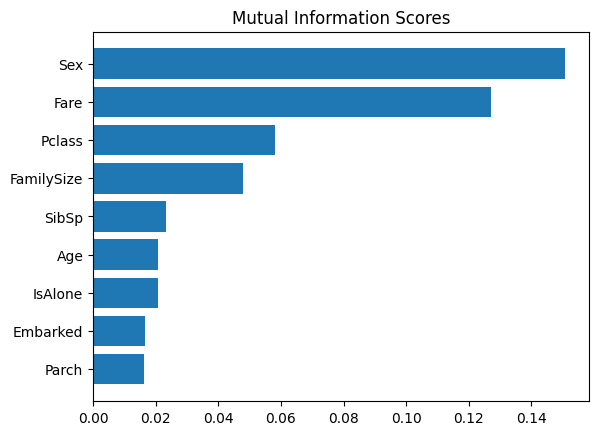

In [20]:
width = np.arange(len(mi_scores))
ticks = list(mi_scores.index)
plt.barh(width, mi_scores)
plt.yticks(width, ticks)
plt.title("Mutual Information Scores")

### Question 1 : La variable Classe est-elle utile pour prévoir la survie ? Pourquoi ?



### Question 2 : Même question pour la variable Sex


### Question 3 : Comment traiter le variables liées à la famille du passager ?





## 3. Traitement des données manquantes (à faire sur les données Train et Test)

3.1 La variable "Embarked" possède des valeurs nulles, compléter par la valeur majoritaire (S).

In [39]:
train_df.Embarked.fillna("S")
test_df.Embarked.fillna("S")

,Embarked
0,Q
1,S
2,Q
3,S
4,S
...,...
413,S
414,C
415,S
416,S


3.2 Afficher l'influence du port d'embarquement sur la Survie

In [40]:
# 3.2 Taux de survie en pourcentage par rapport au port d'embarquement du passager
embarked_survival_rate = train_df.groupby('Embarked', observed=False)['Survived'].mean() * 100
embarked_survival_rate = embarked_survival_rate.round(2).reset_index()
embarked_survival_rate.columns = ['Embarked', 'Survival Rate (%)']
print(embarked_survival_rate)

  Embarked  Survival Rate (%)
0        C              55.36
1        Q              38.96
2        S              33.90


3.3 La variable "Fare" (prix du ticket) possède des valeurs manquantes. Remplacer ces valeurs par la valeur médiane.

In [37]:
train_df.Fare.fillna(train_df.Fare.median())
test_df.Fare.fillna(test_df.Fare.median())

,Fare
0,7.8292
1,7.0000
2,9.6875
3,8.6625
4,12.2875
...,...
413,8.0500
414,108.9000
415,7.2500
416,8.0500


3.4 Créer une variable CategoricalFare Découpant la valeur de ticket en 4 catégories de tailles à peu près égales.

In [38]:
# 3.4 création de la variable CategoricalFare qui découpe la valeur des ticket en 4 catégories
train_df['CategoricalFare'] = pd.qcut(train_df['Fare'], q=4, labels=[1, 2, 3, 4])
test_df['CategoricalFare'] = pd.qcut(test_df['Fare'], q=4, labels=[1, 2, 3, 4])

print(train_df[['Fare', 'CategoricalFare']].head())
print(test_df[['Fare', 'CategoricalFare']].head())

      Fare CategoricalFare
0   7.2500               1
1  71.2833               4
2   7.9250               2
3  53.1000               4
4   8.0500               2
      Fare CategoricalFare
0   7.8292               1
1   7.0000               1
2   9.6875               2
3   8.6625               2
4  12.2875               2


3.5 Analyser l'effet de ces catégories de prix de ticket sur la survie.

In [30]:
# 3.5 Taux de survie en pourcentage par rapport à la catégorie de prix du ticket du passager
categorical_fare_survival_rate = train_df.groupby('CategoricalFare', observed=False)['Survived'].mean() * 100
categorical_fare_survival_rate = categorical_fare_survival_rate.round(2).reset_index()
categorical_fare_survival_rate.columns = ['CategoricalFare', 'Survival Rate (%)']
print(categorical_fare_survival_rate)

  CategoricalFare  Survival Rate (%)
0               1              19.73
1               2              30.36
2               3              45.50
3               4              58.11


3.6 Combien de valeurs d'Age manquent ? Complète par des valeurs entières aléatoires entre (moyenne - écart type) et (moyenne + écart type).

In [44]:
# 3.6 valeurs d'âge manquantes pour les jeux de données train et test
train_df_missing_age = train_df.Age.isnull().sum()
test_df_missing_age = test_df.Age.isnull().sum()

print(f"Age manquant dans train_df : {train_df_missing_age}")
print(f"Age manquant dans test_df : {test_df_missing_age}")

# 3.6 moyenne et écart type de l'âge pour les deux jeux de données
mean_age_train = train_df.Age.mean()
std_age_train = train_df.Age.std()

mean_age_test = test_df.Age.mean()
std_age_test = test_df.Age.std()

np.random.seed(42)
random_age_train = np.random.randint(
    mean_age_train - std_age_train,
    mean_age_train + std_age_train + 1,
    size=train_df_missing_age
)

random_age_test = np.random.randint(
    mean_age_test - std_age_test,
    mean_age_test + std_age_test + 1,
    size=test_df_missing_age
)

train_df.loc[train_df.Age.isnull(), 'Age'] = random_age_train
test_df.loc[test_df.Age.isnull(), 'Age'] = random_age_test

print("=============================")
print(f"Age manquant dans train_df après remplissage : {train_df['Age'].isnull().sum()}")
print(f"Age manquant dans test_df après remplissage : {test_df['Age'].isnull().sum()}")

Age manquant dans train_df : 0
Age manquant dans test_df : 0
Age manquant dans train_df après remplissage : 0
Age manquant dans test_df après remplissage : 0


3.7 Créer une variable CategoricalAge Découpant la valeur d'age en 5 tranches d'age de même taille.

In [45]:
# 3.7 création de la variable CategoricalFare qui découpe la valeur de Age en 5 catégories
train_df['CategoricalAge'] = pd.qcut(train_df['Age'], q=5, labels=[1, 2, 3, 4, 5])
test_df['CategoricalAge'] = pd.qcut(test_df['Age'], q=5, labels=[1, 2, 3, 4, 5])

print(train_df[['Age', 'CategoricalAge']].head())
print(test_df[['Age', 'CategoricalAge']].head())

    Age CategoricalAge
0  22.0              2
1  38.0              4
2  26.0              3
3  35.0              4
4  35.0              4
    Age CategoricalAge
0  34.5              4
1  47.0              5
2  62.0              5
3  27.0              3
4  22.0              2


3.8 Analyser l'effet de ces catégories de prix de ticket sur la survie.

In [46]:
# 3.8 Taux de survie en pourcentage par rapport à la catégorie de prix du ticket du passager
categorical_age_survival_rate = train_df.groupby('CategoricalAge', observed=False)['Survived'].mean() * 100
categorical_age_survival_rate = categorical_age_survival_rate.round(2).reset_index()
categorical_age_survival_rate.columns = ['CategoricalAge', 'Survival Rate (%)']
print(categorical_age_survival_rate)

  CategoricalAge  Survival Rate (%)
0              1              45.64
1              2              33.33
2              3              36.07
3              4              40.00
4              5              36.16


### Question 1 : Classer les variables par ordre d'intérêt

## 4 : Traitement de features complexes

4.1 : Le nom permet de retrouver le titre du passager. Trouver les titres lorsqu'ils existent.

4.2 : En utilisant la fonction pandas crosstab, afficher pour train le nombre d'occurences par titres (en ligne) et par sexe (en colonne)

4.3 :
Remplacer 'Melle et 'Ms' par 'Miss'

Remplacer 'Mme' par 'Mrs'

Creer une valeur "Rare" pour les autres titres avec moins de 10 occurences.

Calculer ensuite le taux de survie par titre

## 5. Mise en forme des données non numériques

5.1 Attribuer une valeur numérique au Genre. Par exemple 0 pour 'female' et 1 pour 'male'

5.2 : Attribuer une valeur pour les possibilités de la variable "Title" ('Master','Miss','Mr','Mrs','Rare')

5.3 Remplacer les titres manquant par 0, et attribuer à la colonne le type entier

5.4 Attribuer une valeur numérique aux 4 catégories de la variable Fare

5.5 Attibuer une valeur numérique au Port d'embarquement (Embarked)

5.6 Supprimer les features inutiles

5.7 Afficher les infos pour les deux datasets

5.8 Sauver les deux datasets dans des fichier csv. Eviter d'écrire un index (n° de ligne)